### 5-1. 케라스로 얕은 신경망 만들기 
- MNIST 손글씨 분류 
- 입력층(28x28=784) -> 은닉층(64개 뉴런, sigmoid) -> 출력층(10개 뉴런, softmax)

In [1]:
import os
import tensorflow as tf
os.environ['TF_METAL_LOGGING'] = '0'

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.16.1
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# mnist dataset loading 
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
3


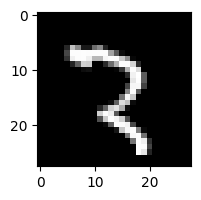

In [4]:
# 데이터 확인 
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

temp_num = 500

plt.figure(figsize=(2,2))
plt.imshow(X_train[temp_num], cmap='grey')
print(y_train[temp_num])

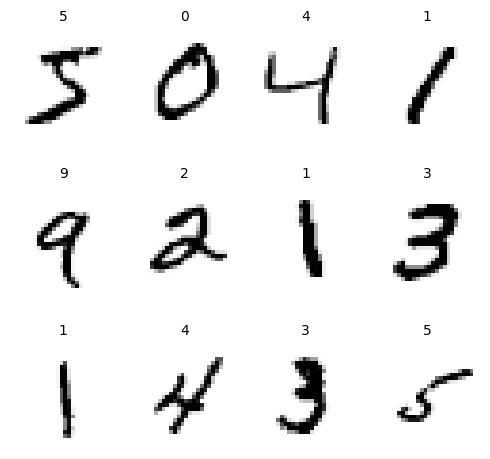

In [5]:
plt.figure(figsize=(5, 5))
for k in range(12): 
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
    plt.title(str(y_train[k]), fontsize=10)  # ← 여기에 라벨 표시
plt.tight_layout()

In [6]:
# X값 변환 
# 2차원(28x28) -> 1차원(784) 펼치기 
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

# 모든 값을  0~1 사이의 실수로 변환 
X_train /= 255
X_valid /= 255 

X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
# y값 변환 : One-Hot encoding 
n_classes = 10 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [8]:
# 신경망 생성 
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

/Users/yb_choi/Downloads/yes/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-08 23:18:35.562245: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-06-08 23:18:35.562261: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-08 23:18:35.562266: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-06-08 23:18:35.562296: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-08 23:18:35.562306: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# compile
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [11]:
# 신경망 훈련 
model.fit(X_train, y_train, 
          batch_size=128, epochs=200, 
          verbose=1, 
          validation_data=(X_valid, y_valid))

Epoch 1/200
  1/469 ━━━━━━━━━━━━━━━━━━━━ 1:51 239ms/step - accuracy: 0.0703 - loss: 2.5178

2025-06-08 23:18:35.819603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3098 - loss: 2.1911 - val_accuracy: 0.6631 - val_loss: 1.8024
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6773 - loss: 1.7083 - val_accuracy: 0.7609 - val_loss: 1.4165
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7593 - loss: 1.3513 - val_accuracy: 0.8034 - val_loss: 1.1353
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8027 - loss: 1.0952 - val_accuracy: 0.8282 - val_loss: 0.9453
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8266 - loss: 0.9253 - val_accuracy: 0.8440 - val_loss: 0.8161
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8417 - loss: 0.8082 - val_accuracy: 0.8544 - val_loss: 0.7253
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8489 - loss: 0.7263 - val_accuracy: 0.8625 - val_loss: 0.6586
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8606 - loss: 0.6578 - val_accuracy: 0.8698

In [12]:
# 모델평가 
model.evaluate(X_valid, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9395 - loss: 0.2081


[0.1819320172071457, 0.9484999775886536]

### 결론 요약:
- 이 모델은 검증 데이터셋에서 약 94.85%의 정확도를 보이고 있음 
- 손실 함수 값인 loss ≒ 0.18은 모델이 예측에서 얼마나 많이 틀렸는지를 정량적으로 보여주는 값 → 낮을수록 좋음
- 즉, 단일 은닉층(sigmoid 64)만으로도 MNIST에서 꽤 양호한 결과를 내고 있다는 뜻입니다.
- 향후 정확도를 더 높이려면 ReLU, Dropout, 더 깊은 네트워크, BatchNormalization, Adam 옵티마이저 등을 도입해볼 수 있습니다. 